In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('train_data.csv')

In [3]:
df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,10/12/2017 8:20,17.32,80.50,0.086,147.700,28.220,30741.00656,19258.50622,10632.948330
1,11/2/2017 2:00,19.59,49.23,0.083,0.095,0.078,23366.15385,18457.43802,10768.192770
2,6/28/2017 16:00,27.72,50.17,4.917,689.700,99.700,33797.08609,21805.82121,22573.292310
3,8/27/2017 7:00,23.39,88.60,4.917,8.370,6.426,24420.86570,14301.16156,13247.398120
4,3/2/2017 18:40,18.46,71.40,4.914,39.410,37.970,43708.59574,25880.48780,24741.290320
...,...,...,...,...,...,...,...,...,...
41927,12/30/2017 5:00,11.32,50.23,0.078,0.081,0.082,20416.73004,17228.59773,9484.753902
41928,5/30/2017 16:50,23.88,64.61,4.919,318.200,221.400,35000.65574,21826.62539,17857.165990
41929,4/4/2017 3:20,15.04,83.40,0.070,0.029,0.130,23560.81808,12827.29124,15162.181820
41930,5/20/2017 14:30,21.93,64.65,0.069,875.000,104.800,34169.70492,20266.25387,18288.583000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41932 entries, 0 to 41931
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                41932 non-null  object 
 1   Temperature             41932 non-null  float64
 2   Humidity                41932 non-null  float64
 3   WindSpeed               41932 non-null  float64
 4   GeneralDiffuseFlows     41932 non-null  float64
 5   DiffuseFlows            41932 non-null  float64
 6   PowerConsumption_Zone1  41932 non-null  float64
 7   PowerConsumption_Zone2  41932 non-null  float64
 8   PowerConsumption_Zone3  41932 non-null  float64
dtypes: float64(8), object(1)
memory usage: 2.9+ MB


In [5]:
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,41932.000000,41932.000000,41932.000000,41932.000000,41932.000000,41932.000000,41932.000000,41932.000000
mean,18.787087,68.295701,1.950687,182.011771,74.741956,32311.143720,21016.861180,17806.590432
std,5.807783,15.550906,2.346862,263.976401,123.574441,7127.356557,5199.130655,6609.098050
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.400000,58.320000,0.078000,0.062000,0.122000,26254.134010,16951.239670,13094.466987
50%,18.740000,69.920000,0.086000,5.088000,4.481500,32243.744680,20796.628785,16400.963860
75%,22.840000,81.400000,4.915000,317.700000,100.700000,37276.016000,24668.607070,21566.445898
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,36645.569620,47598.326360


In [6]:
# convert the date_time column to a datetime datatype
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [7]:
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month
df['Hour'] = df['Datetime'].dt.hour
df['Minute'] = df['Datetime'].dt.minute
df['Day of Week'] = df['Datetime'].dt.dayofweek + 1

In [8]:
def month_to_quarter(series):
    if series['Month'] <=3:
        return 1
    elif series['Month'] >3 and series['Month'] <=6:
        return 2
    elif series['Month'] >6 and series['Month'] <=9:
        return 3
    elif series['Month'] >9 and series['Month'] <=12:
        return 4

In [9]:
df['Quarter of Year'] = df.apply(month_to_quarter, axis='columns')

In [10]:
df['Day of Year'] = df['Datetime'].dt.strftime('%j').astype(int)  

In [11]:
df = df.drop(['Datetime'],axis=1)

In [12]:
df.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3', 'Day', 'Month', 'Hour', 'Minute',
       'Day of Week', 'Quarter of Year', 'Day of Year'],
      dtype='object')

In [13]:
df = df[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'Day',
       'Month', 'Hour', 'Minute', 'Day of Week', 'Quarter of Year',
       'Day of Year','PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3']]

In [14]:
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,Day,Month,Hour,Minute,Day of Week,Quarter of Year,Day of Year,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,17.32,80.50,0.086,147.700,28.220,12,10,8,20,4,4,285,30741.00656,19258.50622,10632.94833
1,19.59,49.23,0.083,0.095,0.078,2,11,2,0,4,4,306,23366.15385,18457.43802,10768.19277
2,27.72,50.17,4.917,689.700,99.700,28,6,16,0,3,2,179,33797.08609,21805.82121,22573.29231
3,23.39,88.60,4.917,8.370,6.426,27,8,7,0,7,3,239,24420.86570,14301.16156,13247.39812
4,18.46,71.40,4.914,39.410,37.970,2,3,18,40,4,1,61,43708.59574,25880.48780,24741.29032


<ipython-input-15-22bb79bd037c>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

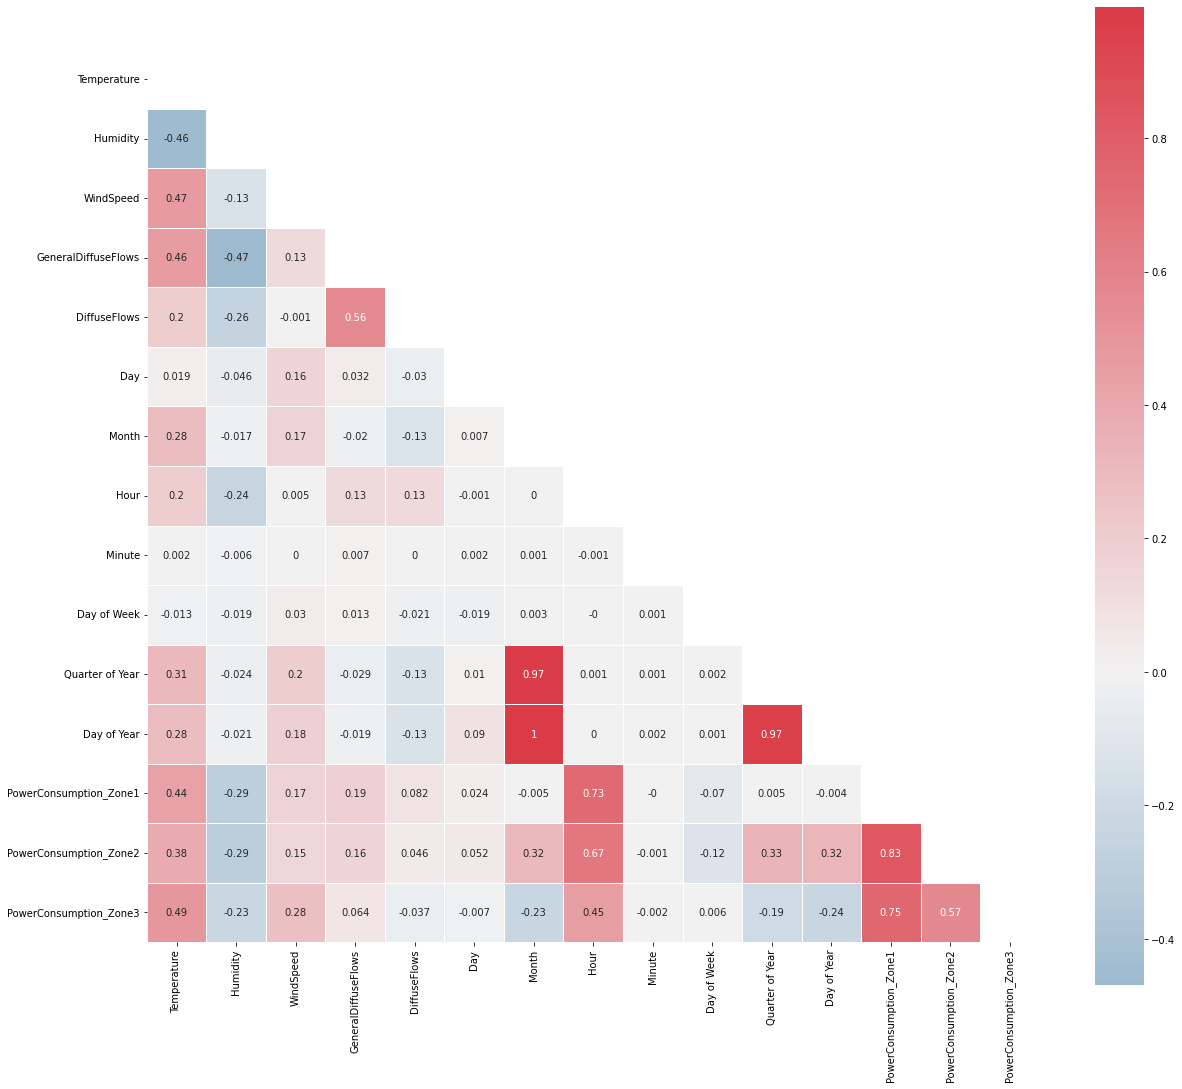

In [15]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessed Dataset
corr = df.corr().round(decimals=3)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [16]:
test_data = pd.read_csv('test_data.csv')

In [17]:
test_data

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
0,2/12/2017 14:40,13.28,82.80,0.074,127.000,128.400
1,11/22/2017 15:30,15.72,48.38,4.923,126.200,119.900
2,10/15/2017 1:50,17.25,85.80,0.079,0.055,0.130
3,9/11/2017 23:00,21.66,60.52,0.270,0.102,0.104
4,12/26/2017 1:20,8.75,79.90,0.079,0.066,0.126
...,...,...,...,...,...,...
10478,2/1/2017 13:00,12.39,47.18,4.920,581.400,623.500
10479,5/17/2017 14:40,21.70,65.90,4.919,780.000,313.900
10480,9/3/2017 7:00,20.34,54.32,4.924,9.500,6.165
10481,11/23/2017 11:40,11.89,60.13,4.921,469.100,45.410


In [18]:
# convert the date_time column to a datetime datatype
test_data['Datetime'] = pd.to_datetime(test_data['Datetime'])

In [19]:
test_data['Day'] = test_data['Datetime'].dt.day
test_data['Month'] = test_data['Datetime'].dt.month
test_data['Hour'] =test_data['Datetime'].dt.hour
test_data['Minute'] = test_data['Datetime'].dt.minute
test_data['Day of Week'] = test_data['Datetime'].dt.dayofweek + 1

In [20]:
test_data['Quarter of Year'] = test_data.apply(month_to_quarter, axis='columns')

In [21]:
test_data['Day of Year'] = test_data['Datetime'].dt.strftime('%j').astype(int)  

In [22]:
test_data = test_data.drop(['Datetime'],axis=1)

In [23]:
test_data = test_data[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'Day',
       'Month', 'Hour', 'Minute', 'Day of Week', 'Quarter of Year',
       'Day of Year']]

In [24]:
test_data.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,Day,Month,Hour,Minute,Day of Week,Quarter of Year,Day of Year
0,13.28,82.80,0.074,127.000,128.400,12,2,14,40,7,1,43
1,15.72,48.38,4.923,126.200,119.900,22,11,15,30,3,4,326
2,17.25,85.80,0.079,0.055,0.130,15,10,1,50,7,4,288
3,21.66,60.52,0.270,0.102,0.104,11,9,23,0,1,3,254
4,8.75,79.90,0.079,0.066,0.126,26,12,1,20,2,4,360


In [25]:
# Split the data into input features and target variable
X_train = df.drop(['PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3'], axis=1)

In [26]:
y_train1 = df['PowerConsumption_Zone1']
y_train2=df['PowerConsumption_Zone2']
y_train3=df['PowerConsumption_Zone3']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

model=XGBRegressor()
from sklearn.metrics import mean_squared_error, r2_score
def objective(trial):
    x_train,x_val,y_train,y_val=train_test_split(df.drop(['PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3'],axis=1),
                                                df['PowerConsumption_Zone3'],test_size=0.1,random_state=42)
    # Define the hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100,500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5,step=0.01),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0,step=0.1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0,step=0.1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0,step=0.1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0,step=0.1),
        'random_state': 42,
        'objective': 'reg:squarederror'
    }
    # Fit the model with the given hyperparameters
    model = XGBRegressor(**params)
    model.fit(x_train, y_train)
    # Predict on the validation set and calculate metrics
    y_pred = model.predict(x_val)
    
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    r2 = r2_score(y_val, y_pred)

    # Return the RMSE as the objective value to optimize
    return rmse

In [28]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.9/211.9 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 5.9 MB/s eta 0:00:00


In [45]:
import optuna
# Set up the Optuna study and run the optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and objective value
print(f"Best hyperparameters: {study.best_params}")
print(f"Best RMSE: {study.best_value}")

# Train the final model with the best hyperparameters and calculate metrics on the test set
best_params = study.best_params
model = XGBRegressor(**best_params)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_valid, y_pred)
print(f"Test set RMSE: {rmse}")
print(f"Test set R-squared: {r2}")

[I 2023-03-06 22:21:32,565] A new study created in memory with name: no-name-55ff0568-50c9-4b5d-be02-a34eb6af8402
[I 2023-03-06 22:21:39,756] Trial 0 finished with value: 553.9481515705605 and parameters: {'n_estimators': 114, 'max_depth': 7, 'learning_rate': 0.26, 'subsample': 0.4, 'colsample_bytree': 0.8, 'reg_alpha': 0.8, 'reg_lambda': 0.2}. Best is trial 0 with value: 553.9481515705605.
[I 2023-03-06 22:21:42,370] Trial 1 finished with value: 1176.4365428564636 and parameters: {'n_estimators': 250, 'max_depth': 4, 'learning_rate': 0.06999999999999999, 'subsample': 0.2, 'colsample_bytree': 0.30000000000000004, 'reg_alpha': 0.1, 'reg_lambda': 0.5}. Best is trial 0 with value: 553.9481515705605.
[I 2023-03-06 22:21:43,791] Trial 2 finished with value: 1866.943346512906 and parameters: {'n_estimators': 132, 'max_depth': 5, 'learning_rate': 0.42000000000000004, 'subsample': 0.7000000000000001, 'colsample_bytree': 0.1, 'reg_alpha': 0.2, 'reg_lambda': 0.6000000000000001}. Best is trial 0 

Best hyperparameters: {'n_estimators': 407, 'max_depth': 10, 'learning_rate': 0.08, 'subsample': 0.8, 'colsample_bytree': 0.9, 'reg_alpha': 0.1, 'reg_lambda': 0.9}
Best RMSE: 352.70884932922985


NameError: ignored

In [49]:
model=XGBRegressor(n_estimators= 489,max_depth= 10, learning_rate=0.0945790561169383, subsample= 0.9940550595493087, colsample_bytree= 0.913307878295417, reg_alpha= 0.958268985326009, reg_lambda= 0.47920903485762545)

In [50]:
model2=XGBRegressor(n_estimators= 435,max_depth= 10, learning_rate=0.06689311024678894, subsample= 0.8814613780849428, colsample_bytree= 0.9627373859551622, reg_alpha= 0.9468903547083829, reg_lambda=  0.8214232820361758)

In [69]:
model3=XGBRegressor(n_estimators= 500,max_depth= 10, learning_rate=0.11, subsample= 0.8, colsample_bytree= 0.99, reg_alpha= 0.5, reg_lambda=  0.99)

In [51]:
model.fit(X_train, y_train1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.913307878295417, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0945790561169383,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=489, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [52]:
model2.fit(X_train, y_train2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9627373859551622, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06689311024678894,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=435, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [70]:
model3.fit(X_train, y_train3)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.09, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [36]:
X_test=test_data

In [71]:
predzone1=model.predict(X_test)
predzone2=model2.predict(X_test)
predzone3=model3.predict(X_test)

In [72]:
# créer une DataFrame avec les prédictions
df_preds = pd.DataFrame({'predicted_Zone1': predzone1, 'predicted_Zone2': predzone2, 'predicted_Zone3': predzone3})

In [73]:
sample=pd.read_csv('sample_data.csv')

In [74]:
# obtenir la colonne datetime de la DataFrame2
datetime_col = sample['Datetime']

In [75]:
# concaténer les deux DataFrames
df_result = pd.concat([datetime_col, df_preds], axis=1)

In [76]:
# enregistrer la DataFrame en fichier CSV
df_result.to_csv('XGBRegressor5.csv', index=False)

In [77]:
df_result

,Datetime,predicted_Zone1,predicted_Zone2,predicted_Zone3
0,2/12/2017 14:40,33241.511719,18768.841797,18282.033203
1,11/22/2017 15:30,30315.894531,24091.906250,10564.787109
2,10/15/2017 1:50,27667.316406,15943.583984,12179.931641
3,9/11/2017 23:00,36753.867188,21556.169922,18006.539062
4,12/26/2017 1:20,23354.478516,18908.560547,10544.283203
...,...,...,...,...
10478,2/1/2017 13:00,34991.800781,20798.931641,17253.513672
10479,5/17/2017 14:40,35075.765625,23070.767578,17809.068359
10480,9/3/2017 7:00,22595.603516,11302.491211,11889.022461
10481,11/23/2017 11:40,31221.939453,23293.177734,11394.571289
